# Análisis Exploratorio   

## 1. Importación de librerías y configuración inicial

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [4]:
# Configuración para gráficos
sns.set(style="whitegrid")
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)
# Configuración para mostrar todas las filas
pd.set_option('display.max_rows', None)
# Configuración para ancho de visualización
pd.set_option('display.width', 200)

## 2.Lectura y exploración básica de los datos


In [5]:
print("="*50)
print("CARGANDO Y EXPLORANDO DATOS")
print("="*50)

# Cargar los datos de entrenamiento (contienen la variable objetivo SalePrice)
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Mostrar información básica de los datos
print("\nInformación del conjunto de entrenamiento:")
print(train_data.info())

# Dimensiones del conjunto de datos
print(f"\nDimensiones del conjunto de entrenamiento: {train_data.shape}")
print(f"Dimensiones del conjunto de prueba: {test_data.shape}")

# Muestra de los primeros registros
print("\nPrimeros registros del conjunto de entrenamiento:")
print(train_data.head())

# Estadísticas descriptivas básicas
print("\nEstadísticas descriptivas del conjunto de entrenamiento:")
print(train_data.describe())

CARGANDO Y EXPLORANDO DATOS

Información del conjunto de entrenamiento:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-

## 3. Análisis de valores faltantes



ANÁLISIS DE VALORES FALTANTES

Columnas con valores faltantes (ordenadas):
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

Porcentaje de valores faltantes por columna:
PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.5479

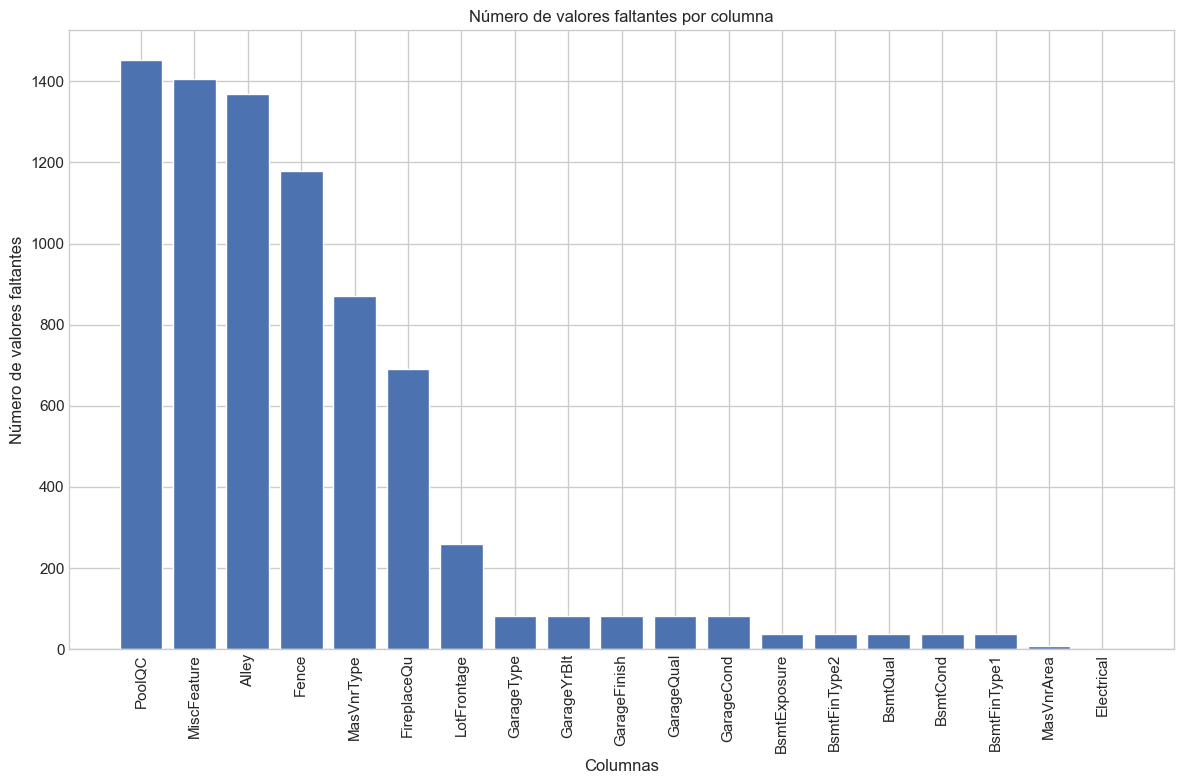

In [6]:
print("\n")
print("="*50)
print("ANÁLISIS DE VALORES FALTANTES")
print("="*50)

# Contar valores nulos por columna
missing_values = train_data.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print("\nColumnas con valores faltantes (ordenadas):")
print(missing_values)

# Calcular porcentaje de valores faltantes
missing_percentage = (missing_values / len(train_data)) * 100
print("\nPorcentaje de valores faltantes por columna:")
print(missing_percentage)

# Visualización de valores faltantes (si hay muchos)
if len(missing_values) > 0:
    plt.figure(figsize=(12, 8))
    plt.bar(missing_values.index, missing_values.values)
    plt.title('Número de valores faltantes por columna')
    plt.xticks(rotation=90)
    plt.xlabel('Columnas')
    plt.ylabel('Número de valores faltantes')
    plt.tight_layout()
    plt.show()


## 4. Análisis descriptivo de la variable objetivo (SalePrice)




ANÁLISIS DE LA VARIABLE OBJETIVO: SalePrice

Estadísticas descriptivas de SalePrice:
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


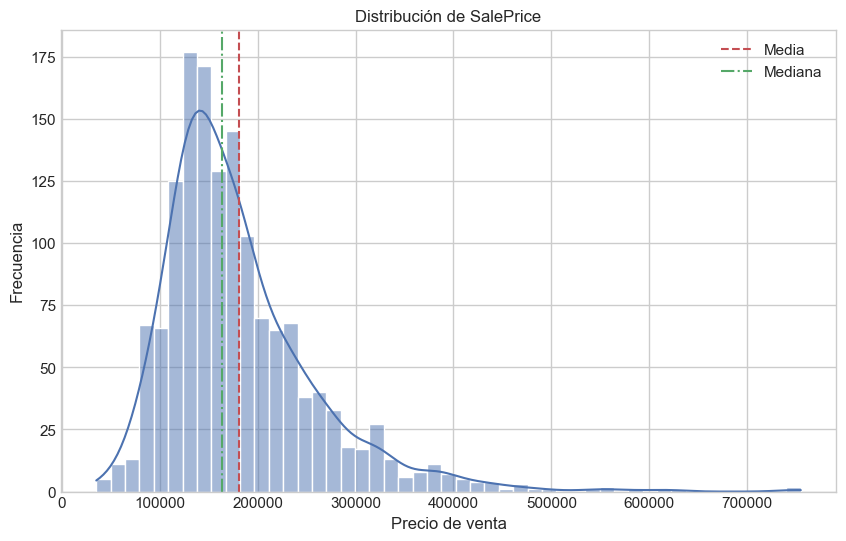

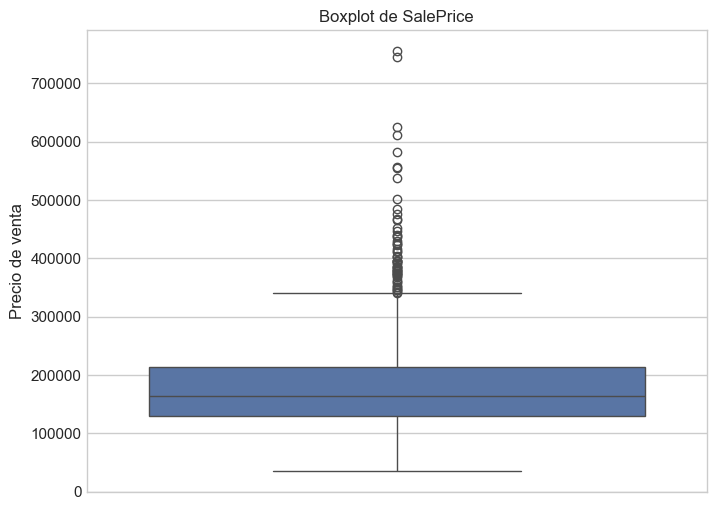

In [8]:
print("\n")
print("="*50)
print("ANÁLISIS DE LA VARIABLE OBJETIVO: SalePrice")
print("="*50)

# Estadísticas descriptivas de SalePrice
print("\nEstadísticas descriptivas de SalePrice:")
print(train_data['SalePrice'].describe())

# Visualización de la distribución de SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(train_data['SalePrice'], kde=True)
plt.title('Distribución de SalePrice')
plt.xlabel('Precio de venta')
plt.ylabel('Frecuencia')
plt.axvline(train_data['SalePrice'].mean(), color='r', linestyle='--', label='Media')
plt.axvline(train_data['SalePrice'].median(), color='g', linestyle='-.', label='Mediana')
plt.legend()
plt.show()

# Boxplot de SalePrice
plt.figure(figsize=(8, 6))
sns.boxplot(y=train_data['SalePrice'])
plt.title('Boxplot de SalePrice')
plt.ylabel('Precio de venta')
plt.show()


## 5. Análisis de normalidad de SalePrice



ANÁLISIS DE NORMALIDAD DE SalePrice


<Figure size 1000x600 with 0 Axes>

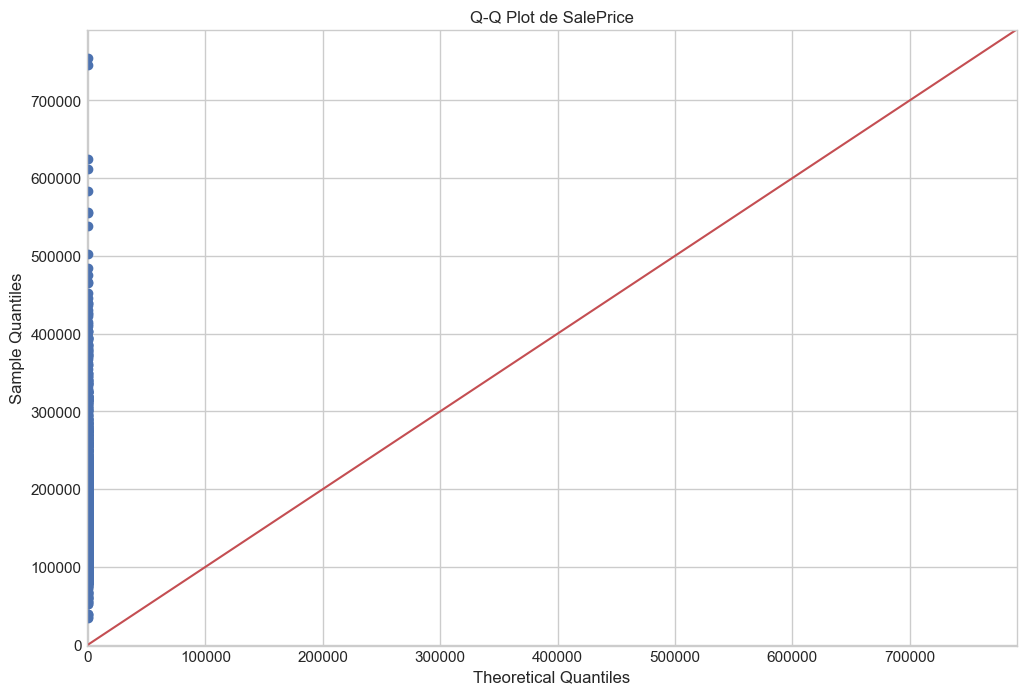


Prueba de Shapiro-Wilk para SalePrice:
Estadístico W: 0.869671
Valor p: 0.000000
Conclusión: SalePrice no sigue una distribución normal (se rechaza H0)


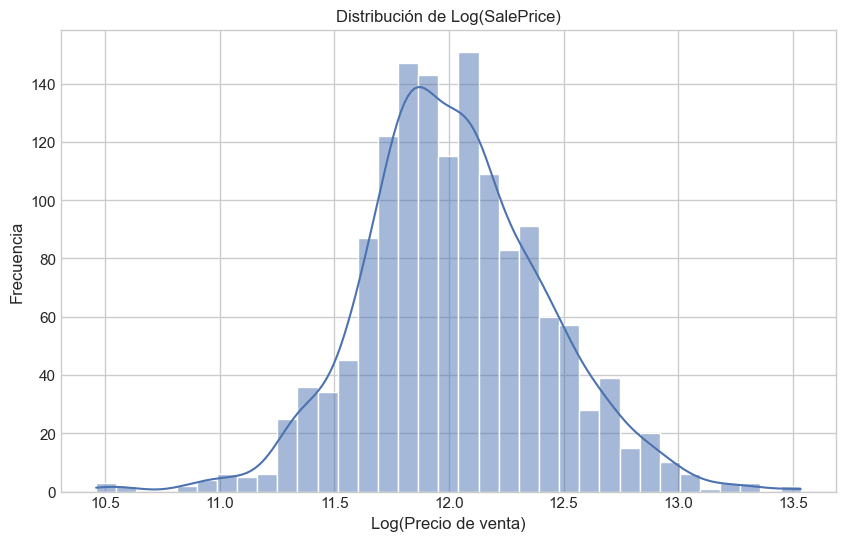

<Figure size 1000x600 with 0 Axes>

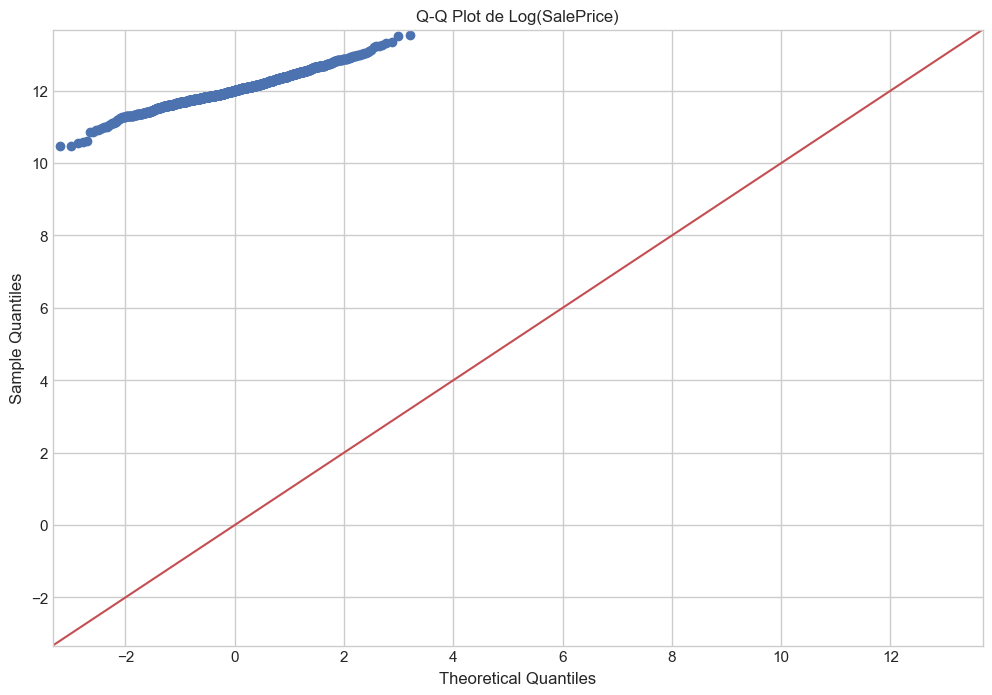


Prueba de Shapiro-Wilk para Log(SalePrice):
Estadístico W: 0.991207
Valor p: 0.000000
Conclusión: Log(SalePrice) no sigue una distribución normal (se rechaza H0)


In [18]:
print("\n")
print("="*50)
print("ANÁLISIS DE NORMALIDAD DE SalePrice")
print("="*50)

# QQ Plot para SalePrice
plt.figure(figsize=(10, 6))
sm.qqplot(train_data['SalePrice'], line='45')
plt.title('Q-Q Plot de SalePrice')
plt.show()

# Prueba de Shapiro-Wilk para normalidad
shapiro_test = stats.shapiro(train_data['SalePrice'])
print(f"\nPrueba de Shapiro-Wilk para SalePrice:")
print(f"Estadístico W: {shapiro_test[0]:.6f}")
print(f"Valor p: {shapiro_test[1]:.6f}")
if shapiro_test[1] < 0.05:
    print("Conclusión: SalePrice no sigue una distribución normal (se rechaza H0)")
else:
    print("Conclusión: SalePrice sigue una distribución normal (no se rechaza H0)")

# Transformación logarítmica de SalePrice
train_data['LogSalePrice'] = np.log(train_data['SalePrice'])

# Visualización de la distribución logarítmica
plt.figure(figsize=(10, 6))
sns.histplot(train_data['LogSalePrice'], kde=True)
plt.title('Distribución de Log(SalePrice)')
plt.xlabel('Log(Precio de venta)')
plt.ylabel('Frecuencia')
plt.show()

# QQ Plot para Log(SalePrice)
plt.figure(figsize=(10, 6))
sm.qqplot(train_data['LogSalePrice'], line='45')
plt.title('Q-Q Plot de Log(SalePrice)')
plt.show()

# Prueba de Shapiro-Wilk para la transformación logarítmica
shapiro_log = stats.shapiro(train_data['LogSalePrice'])
print(f"\nPrueba de Shapiro-Wilk para Log(SalePrice):")
print(f"Estadístico W: {shapiro_log[0]:.6f}")
print(f"Valor p: {shapiro_log[1]:.6f}")
if shapiro_log[1] < 0.05:
    print("Conclusión: Log(SalePrice) no sigue una distribución normal (se rechaza H0)")
else:
    print("Conclusión: Log(SalePrice) sigue una distribución normal (no se rechaza H0)")
